# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [42]:
#!kaggle datasets download -d khaledzsa/bus-breakdown-and-delays
#!unzip bus-breakdown-and-delays.zip

## Importing Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore,iqr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from

In [44]:
df=pd.read_csv("/content/Bus_Breakdown_and_Delays.csv")


## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [45]:
df

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147967,2016-2017,1338452,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,...,15-20,7,Yes,Yes,No,04/05/2017 08:10:00 AM,NaN,04/05/2017 08:10:15 AM,Running Late,Pre-K
147968,2016-2017,1341521,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,...,20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,NaN,04/24/2017 07:44:15 AM,Running Late,Pre-K
147969,2016-2017,1353044,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,...,20-25MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,90323827,05/25/2017 04:34:36 PM,Running Late,School-Age
147970,2016-2017,1353045,Special Ed PM Run,5525D,Q920,Won`t Start,24457,05/25/2017 04:27:00 PM,05/25/2017 04:30:00 PM,Queens,...,NaN,0,Yes,Yes,No,05/25/2017 04:30:00 PM,NaN,05/25/2017 04:30:07 PM,Breakdown,School-Age


In [46]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [48]:
df["How_Long_Delayed"].unique()

array(['10MINUTES', '25 MINUTES', '15 MINUTES', ..., '40 -50 MIN',
       '80 MIN', '45 MINIUTE'], dtype=object)

In [49]:
df["Bus_No"].unique()

array(['811', '9302', '358', ..., '0096', 'GVC510', 'K9345'], dtype=object)

In [50]:
df.select_dtypes(include=np.number).describe()
#there is no way that 9007 student are in the bus so this is an outlier and we need to remove it

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [51]:
df.select_dtypes(exclude=np.number).describe()

,School_Year,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
count,147972,147883,147972,147884,147870,147972,147972,147972,141654,147972,126342,147972,147972,147972,147972,5632,147972,147972,147972
unique,4,10,10765,11283,10,5180,70108,75822,11,91,1863,2,2,2,75822,4666,145769,2,2
top,2016-2017,Special Ed AM Run,9354,1,Heavy Traffic,C814,01/25/2016 07:30:00 AM,01/26/2016 07:57:00 AM,Bronx,"G.V.C., LTD.",20 MINS,Yes,Yes,No,01/26/2016 07:57:00 AM,x,12/20/2016 02:31:32 PM,Running Late,School-Age
freq,83141,85990,468,2569,87426,1735,39,19,40995,14198,5662,139127,113098,101355,19,113,4,130857,127003


In [52]:
df.isna().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [53]:
#corr

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [54]:
#no duplication
df.duplicated().sum()

0

###handle Missing data

In [55]:
df.isna().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [56]:
df=df.drop(columns="Incident_Number")

In [57]:
df["How_Long_Delayed"]=df["How_Long_Delayed"].fillna(df["How_Long_Delayed"].mode()[0])
df["How_Long_Delayed"].isna().sum()

0

In [58]:
df.isna().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [59]:
#cannot impute the boro column as it represents the location
df["Boro"].unique()

array(['Bronx', nan, 'Queens', 'Brooklyn', 'Nassau County', 'Manhattan',
       'Westchester', 'Staten Island', 'All Boroughs', 'Rockland County',
       'Connecticut', 'New Jersey'], dtype=object)

In [60]:
df=df.dropna()

In [61]:
df.isna().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,0


In [62]:
df

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,"G.V.C., LTD.",10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,"G.V.C., LTD.",25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,"G.V.C., LTD.",15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,"G.V.C., LTD.",10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,"G.V.C., LTD.",10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,09/18/2015 07:56:40 AM,Running Late,Pre-K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147967,2016-2017,1338452,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,"G.V.C., LTD.",15-20,7,Yes,Yes,No,04/05/2017 08:10:00 AM,04/05/2017 08:10:15 AM,Running Late,Pre-K
147968,2016-2017,1341521,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,"G.V.C., LTD.",20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,04/24/2017 07:44:15 AM,Running Late,Pre-K
147969,2016-2017,1353044,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,G.V.C. LTD. (B2192),20-25MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,05/25/2017 04:34:36 PM,Running Late,School-Age
147970,2016-2017,1353045,Special Ed PM Run,5525D,Q920,Won`t Start,24457,05/25/2017 04:27:00 PM,05/25/2017 04:30:00 PM,Queens,LITTLE RICHIE BUS SERVICE,20 MINS,0,Yes,Yes,No,05/25/2017 04:30:00 PM,05/25/2017 04:30:07 PM,Breakdown,School-Age


###handle outliers

In [63]:
df=df[abs(zscore(df["Number_Of_Students_On_The_Bus"])<2.3)]
#after testing the threshold for the outliers from 3 down to 2.3 where 100 students on the bus
# seems possible
df

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,"G.V.C., LTD.",10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,"G.V.C., LTD.",25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,"G.V.C., LTD.",15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,"G.V.C., LTD.",10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,"G.V.C., LTD.",10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,09/18/2015 07:56:40 AM,Running Late,Pre-K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147967,2016-2017,1338452,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,"G.V.C., LTD.",15-20,7,Yes,Yes,No,04/05/2017 08:10:00 AM,04/05/2017 08:10:15 AM,Running Late,Pre-K
147968,2016-2017,1341521,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,"G.V.C., LTD.",20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,04/24/2017 07:44:15 AM,Running Late,Pre-K
147969,2016-2017,1353044,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,G.V.C. LTD. (B2192),20-25MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,05/25/2017 04:34:36 PM,Running Late,School-Age
147970,2016-2017,1353045,Special Ed PM Run,5525D,Q920,Won`t Start,24457,05/25/2017 04:27:00 PM,05/25/2017 04:30:00 PM,Queens,LITTLE RICHIE BUS SERVICE,20 MINS,0,Yes,Yes,No,05/25/2017 04:30:00 PM,05/25/2017 04:30:07 PM,Breakdown,School-Age


In [64]:
df.select_dtypes(include=np.number).describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.413070e+05,141307.000000
mean,1.287602e+06,2.632651
std,4.324682e+04,4.595488
min,1.212681e+06,0.000000
25%,1.250186e+06,0.000000
50%,1.287624e+06,0.000000
75%,1.324976e+06,4.000000
max,1.362605e+06,109.000000


###

### Split the Dataset and encoding
Next, split the dataset into training, validation, and testing sets.

In [65]:
df

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,"G.V.C., LTD.",10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,"G.V.C., LTD.",25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,"G.V.C., LTD.",15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,"G.V.C., LTD.",10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,"G.V.C., LTD.",10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,09/18/2015 07:56:40 AM,Running Late,Pre-K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147967,2016-2017,1338452,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,"G.V.C., LTD.",15-20,7,Yes,Yes,No,04/05/2017 08:10:00 AM,04/05/2017 08:10:15 AM,Running Late,Pre-K
147968,2016-2017,1341521,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,"G.V.C., LTD.",20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,04/24/2017 07:44:15 AM,Running Late,Pre-K
147969,2016-2017,1353044,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,G.V.C. LTD. (B2192),20-25MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,05/25/2017 04:34:36 PM,Running Late,School-Age
147970,2016-2017,1353045,Special Ed PM Run,5525D,Q920,Won`t Start,24457,05/25/2017 04:27:00 PM,05/25/2017 04:30:00 PM,Queens,LITTLE RICHIE BUS SERVICE,20 MINS,0,Yes,Yes,No,05/25/2017 04:30:00 PM,05/25/2017 04:30:07 PM,Breakdown,School-Age


In [66]:
# to encode, scale and manuplate data we should not use the test data so i will split before i do so
# and choosing relivant features for our model
x=df.drop(columns=['Breakdown_or_Running_Late',"Busbreakdown_ID"])
y=df["Breakdown_or_Running_Late"]
# i moved it after the issue
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

x_train

,School_Year,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,School_Age_or_PreK
21753,0,General Ed AM Run,2706,K1606,Heavy Traffic,16005,01/13/2016 05:37:00 AM,01/13/2016 05:39:00 AM,Brooklyn,"MV TRANSPORTATION, INC.",20 MIN,0,Yes,Yes,Yes,01/13/2016 05:39:00 AM,01/13/2016 05:39:19 AM,School-Age
93424,1,Special Ed AM Run,2143,R709,Heavy Traffic,31469,01/10/2017 07:42:00 AM,01/10/2017 07:43:00 AM,Staten Island,"RELIANT TRANS, INC. (B232",20 min,8,Yes,Yes,Yes,01/10/2017 07:43:00 AM,01/10/2017 07:43:58 AM,School-Age
70360,1,Special Ed AM Run,8923D,P365,Heavy Traffic,26808,10/07/2016 07:38:00 AM,10/07/2016 07:39:00 AM,Queens,LOGAN BUS COMPANY INC.,30MINS,0,Yes,Yes,No,10/07/2016 07:39:00 AM,10/07/2016 07:39:51 AM,School-Age
15739,0,Special Ed AM Run,1454,M762,Heavy Traffic,03420,12/09/2015 06:41:00 AM,12/09/2015 06:41:00 AM,Manhattan,LEESEL TRANSP CORP (B2192,20,3,Yes,Yes,No,12/09/2015 06:41:00 AM,12/09/2015 06:41:15 AM,School-Age
108752,1,Special Ed AM Run,GC0105,Y813,Weather Conditions,11494,03/15/2017 07:25:00 AM,03/15/2017 07:27:00 AM,Queens,G.V.C. LTD. (B2192),20-35 MIN,0,Yes,Yes,Yes,03/15/2017 07:27:00 AM,03/15/2017 10:32:13 AM,School-Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115333,1,Special Ed AM Run,828D,Q351,Mechanical Problem,25219,03/31/2017 07:15:00 AM,03/31/2017 07:17:00 AM,Queens,LORINDA ENT. LTD.,35MIN,0,Yes,Yes,No,03/31/2017 07:17:00 AM,03/31/2017 07:17:09 AM,School-Age
125471,1,Special Ed AM Run,1316,M516,Heavy Traffic,02699,05/09/2017 08:19:00 AM,05/09/2017 08:20:00 AM,Manhattan,LEESEL TRANSP CORP (B2192,20 MINS,3,Yes,Yes,No,05/09/2017 08:20:00 AM,05/09/2017 08:20:40 AM,School-Age
108381,1,Special Ed AM Run,19632,K099,Other,13046,03/15/2017 06:13:00 AM,03/15/2017 06:15:00 AM,Brooklyn,"BORO TRANSIT, INC.",30 mins,0,Yes,No,Yes,03/15/2017 06:15:00 AM,03/15/2017 06:36:02 AM,School-Age
138196,1,Special Ed AM Run,2531,M491,Accident,02151,06/22/2017 07:15:00 AM,06/22/2017 07:18:00 AM,Manhattan,"RELIANT TRANS, INC. (B232",20 min,0,Yes,Yes,Yes,06/22/2017 07:18:00 AM,06/22/2017 07:18:15 AM,School-Age


### the issue

In [67]:
scaler = MinMaxScaler().set_output(transform='pandas')
onehot = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
Ordinal = OrdinalEncoder().set_output(transform='pandas')
label=LabelEncoder()
xcat_cols=x.select_dtypes(include=object).columns
num=["Number_Of_Students_On_The_Bus"]

In [75]:

#for some reason the fit wasint working with the test so i just fitted on the whole dataset
"""
pipe = make_pipeline(
  ColumnTransformer(
             transformers=[("num",scaler,["Number_Of_Students_On_The_Bus"]),
                           ('cat',Ordinal,xcat_cols ) ] ).set_output(transform='pandas') )"""

In [69]:
#pipe.fit(x_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Number_Of_Students_On_The_Bus']),
                                                 ('cat', OrdinalEncoder(),
                                                  Index(['Run_Type', 'Bus_No', 'Route_Number', 'Reason', 'Schools_Serviced',
       'Occurred_On', 'Created_On', 'Boro', 'Bus_Company_Name',
       'How_Long_Delayed', 'Has_Contractor_Notified_Schools',
       'Has_Contractor_Notified_Parents', 'Have_You_Alerted_OPT',
       'Informed_On', 'Last_Updated_On', 'School_Age_or_PreK'],
      dtype='object'))]))])

In [70]:
#pipe.fit(x_train)

In [71]:
x_test

,School_Year,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,School_Age_or_PreK
103415,1,Pre-K/EI,52146,B0922A,Other,C311,02/16/2017 06:20:00 AM,02/16/2017 06:38:00 AM,Brooklyn,L & M BUS CORP.,30 MINS,0,Yes,Yes,Yes,02/16/2017 06:38:00 AM,02/16/2017 06:38:34 AM,Pre-K
4374,0,Special Ed PM Run,5521D,X599,Won`t Start,07006,09/28/2015 02:30:00 PM,09/28/2015 02:32:00 PM,Bronx,LITTLE RICHIE BUS SERVICE,20 MINS,5,Yes,Yes,No,09/28/2015 02:32:00 PM,09/28/2015 02:32:24 PM,School-Age
65201,0,Special Ed PM Run,508,L992,Other,14646,10/13/2015 02:33:00 PM,10/13/2015 02:33:00 PM,Brooklyn,HAPPY CHILD TRANS LLC (B2,60 MIN,2,Yes,Yes,No,10/13/2015 02:33:00 PM,10/13/2015 02:33:57 PM,School-Age
29674,0,Special Ed AM Run,2527,L507,Heavy Traffic,21506,02/10/2016 06:53:00 AM,02/10/2016 06:55:00 AM,Bronx,"RELIANT TRANS, INC. (B232",20 MIN,2,Yes,Yes,Yes,02/10/2016 06:55:00 AM,02/10/2016 06:55:02 AM,School-Age
29503,0,Special Ed AM Run,10259,P701,Heavy Traffic,26481,12/04/2015 07:45:00 AM,12/04/2015 08:05:00 AM,Queens,HOYT TRANSPORTATION CORP.,30min,7,Yes,Yes,No,12/04/2015 08:05:00 AM,12/04/2015 08:05:22 AM,School-Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35367,0,General Ed AM Run,379,K1618,Accident,32086,03/11/2016 07:00:00 AM,03/11/2016 07:00:00 AM,Brooklyn,LOGAN BUS COMPANY INC.,20 MIN,0,Yes,Yes,No,03/11/2016 07:00:00 AM,03/11/2016 07:00:36 AM,School-Age
15629,0,Special Ed PM Run,NI0634,K002,Heavy Traffic,21199,12/08/2015 02:05:00 PM,12/08/2015 02:14:00 PM,Brooklyn,"NEW DAWN TRANSIT, LLC (B2",45 MIN,0,Yes,Yes,No,12/08/2015 02:14:00 PM,12/08/2015 02:14:28 PM,School-Age
95376,1,Special Ed AM Run,NI6237,K073,Heavy Traffic,20069,01/18/2017 06:40:00 AM,01/18/2017 06:41:00 AM,Brooklyn,"NEW DAWN TRANSIT, LLC (B2",35 MINUTES,0,Yes,Yes,No,01/18/2017 06:41:00 AM,01/18/2017 06:41:31 AM,School-Age
144526,1,Special Ed AM Run,2114,L545,Heavy Traffic,15169,11/01/2016 06:30:00 AM,11/01/2016 06:31:00 AM,Brooklyn,"RELIANT TRANS, INC. (B232",20 MIN,0,Yes,Yes,Yes,11/01/2016 06:31:00 AM,11/01/2016 06:31:18 AM,School-Age


In [72]:
"""sx_train=pipe.transform(x_train)
"""

In [73]:
"""sx_test=pipe.transform(x_test)"""

ValueError: Found unknown categories ['EY1313', '4191', 'NI616', '27849', '20392', '980', '17132', '5851', 'NI0112', 'HT 1406', '522274', '26225', '8667D', 'NI1985', 'EL 1037', '16766', '2717', '24425', '27658', '1418`', 'NI0235', 'VN 24645', 'TNO225', 'NI2216', '4812', '08:45AM', 'TMNO322', '36542', '25407', 'GC000076', 'N1488', 'TN0404', '5896', '4482', '017331', '2958', '20393', '570D', '5726D', '08420', '122499', 'NI0419', 'GC128', '5241', 'TN0414', '2308/632', '46209', '6065', '85074', '9025', 'VN 24629', 'NI3107', 'K9059', '8511', '11681', '1717D', 'NI2293', '385', '5535', 'NI44854', '6223', '5426', 'TNO379', '4211', 'GT 1407', '8515D', 'NK 2174', '12490', '26816', '28742', '25524', '02142', 'VN216', 'NI14863', 'RN 2321', '5228', '031020', '8974', 'NI-0486', 'VN0237', '8017', 'ZF0077', '6164', '016246', '3524', '16632', '86035', '57077D', '5799D', '50010', '1699', '9652', '25422', '21244', 'NIO812', '106298', 'GT 2115', 'GC103', 'NK2086', '21319', 'FR1636', '4690D', '5631', 'FR2601', '2153.', 'NI-8286', '6472D', '156008', '25527', '11119', '1609D', '32087', '36244', '247', '0899', '32001', '6552', '/8008', '3390', '1061-1625', '24606', '537', '3023', 'IN317', '20308', 'NI-140', '017237', '1907D', '1569', '5306', '054', '6242', 'IN2131', 'VAN 90', '4430D', 'FR 2512', 'FR1400', '17345', '86024', '6130', '4056', '6139', '27756', '21242', 'GC0900', 'PL1410', 'B0233A', '6600', '11526', 'GT141503', 'IN1487', '3152', '11210', '6240', '116266', 'PL1430', 'HT1400', '203990', '43240', '42153', '19535', 'GC00137', '4180', '2337V', 'P863', '2170', '176D', '20325', 'GC0730', '4320', '8547', '42067', '20154', '5894D', '56617', 'GT 1491', '516003', 'NI-5211', 'NI028', '522222', '408D', '487169', 'GT 1471', 'NI0693', '2833', '994', 'VN74013', 'NI3911', 'NI-0850', 'N1510', 'ZF0070', '25509', '5667DD', '4245', '22774', 'XXXXXX', 'NI-4435', '26271', '5377', '8053', 'YM214', 'BV0055', 'NI0815', 'FR1327', '5919D', '24617', '5891D', '19295', 'HT1501', '2387V', '5895', 'NI-0307', 'VN80112', '24152', '6265', '5854', '5667', '470D', '17341', 'HT2546', 'FR 2406', 'NI511', '28478', 'TZ1375', '30431', '6512', '160D', '5579D', '4459', '-', '3265', 'VN2465', '27599', '58/37D', '26464', 'GC00112', '8533', '11653', 'FR1013', '516005', 'N0940', 'HA 640', 'GCOO47', '3838', 'NI609', '9932', '12550', 'VN 26203', '31114', 'GT 1406', '8088', 'BRONX', 'LW4137', 'GV001', '24071', '2465', 'NI-4901', 'EL 1008', 'GC107', '18271', '1432PM', '25506', '10425', '2816', '8975', '4422 D', 'QUEENS', 'NI1479', 'NI0505', '5048', '56061', '6566', 'NI4506', '5721', 'HT1405', 'GV332', '693', 'TN0402', 'NI 939', 'TNO349', 'NI-313', '36420', '5534', 'N0I313', '4596', '7:30 AM', 'IN925', 'LH6105', 'IN3111', 'FR1211', '3541', '10592', '10330', '3598', '4014`', 'NK2105', 'LK1346', '8573D', '6211', '551', 'VN 74642', '0049', '440D', 'NI1927', 'NI0198', '0202', '4222', '017241', 'FR2730', '8997', 'NK 2095', '8:35AM', 'SR1633', '12528', '016252', 'TN6167', 'NI-2569', '10248', 'TZ1313', '19253', '7:07 AM', '8987', '8090', 'NI0825', '6561', '21239', '5316', '3550', '3034', 'GT2206', '517', 'NI240', 'K418', '1 HR', '25526', 'TNO364', 'FR 1004', '481', '8802', '3520', '10530', '8919DD', '22901', '8227D', '11358', '8982', '14511', 'HT2204', 'GT2474', '20929', '5484', '1588', '4906', '465/2257', '16313', '3510', '4476', 'B0234A', '24551', '31C', '3568', 'EL 613', '2770', '26576', '5674', '85021', '0063', '21746', '5500', '3454', 'NI2138', '3395D', 'FR 2202', 'M1443', '6142', '52136', 'RN2325', '8082', '035', '42170', 'NI416', '0635', 'ZF0055', 'GV01117', '17371', 'NI-3186', '5673D', 'TN0432', 'VN 74624', 'LK1428', '2367/2255', 'TNO385', '016151', 'FR 1515', '2384V', 'GC01015', 'NI-0924', '25514', 'N1522', '36268', '1161', '16305', 'TNO427', '23G', '02/10/17', 'GC001', '15079', 'NI1629', '6172', '4760', '20901', '41115', '1912D', '6128', 'EF1835', 'TNO429', '4421', '16316', 'FR1328', '74651', '8605', '10563', '5825', '6236', '56065', '4444D', 'NI487', '718101', 'VN 24627', '2490', '54063', 'NI2416', 'NI0625', '5327', '4837', 'LK1642', 'NI-0645', '8829D', '11462', 'LK1364', '4643', '11321', 'GC033', '419D0', '2249', '3503', '10245', '7450', 'FLAT TIRE', 'FR1626', '5139D', '458D', '12056', '16154', '42181', 'X541', '29653', '0050', 'NI-2111', '2713', '19370', '4307', '187D', '4143', 'TN0372', '516026', '1618', '8898D', 'PL1610', 'GV730', '8809 D', '681289', 'NI2579', 'NI4450', '8849D', 'NI06376', 'GV9313', '8545', '99 D', '8871', 'NI0620', '19572', '22156', '21504', '47729', 'GT 1449', '0027', '61666', '42234', '27765', '4413', '13997', '88623D', 'NI0831', '44441D', 'RV2051', 'TNO360', '5513', 'NI-4482', '12456', '15238', '1446D57D', '4148', '5878D', '12572', '361.', 'IS27', '4144D', '1866', 'NI 2113', '017270', '1704D', 'HA  624', '5869D', 'NI539', '52223', '017285', 'HEL #6', '5080', '3275', '4993', '16252', 'TN0610', '41230', '2258', 'HA 862', '24435', '35MINS', 'GT478', '3301', '4801', '1560', 'NI0485', 'HA532', '16511', '97 D', 'GV 0514', '017283', '15418', '4436', '6:52 AM', 'TM0220', '2960', '8215', '86029', 'BV0035', '#', '5451D', 'HA 646', 'NI-3145', 'VN 225', 'FR2661', '22478', 'IN2117', '3380', '5161', '1410D', '3394D', 'NI-4155', 'GT 1464', 'HA 99848', '8777D'] in column 1 during transform

In [ ]:
#label.fit(y_train)

In [ ]:
#sy_train=label.transform(y_train)
#sy_train

###encoding

In [82]:
for i in df[xcat_cols]:
  x[i]=label.fit_transform(x[i])
y=label.fit_transform(y)
x

,School_Year,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,School_Age_or_PreK
0,0,3,7412,77,6,4983,55105,59448,1,26,187,5,1,1,0,59448,111404,0
1,0,3,8040,77,3,5051,55405,59755,1,26,819,3,1,1,0,59755,111979,0
2,0,3,4617,209,3,4949,47076,50478,1,26,327,12,1,1,1,50478,93900,0
3,0,3,4505,209,6,4948,46936,50308,1,26,106,11,1,1,1,50308,93634,0
4,0,3,4512,209,6,5129,47079,50485,1,26,187,12,1,1,0,50485,93960,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147967,1,3,8064,209,3,5021,21007,22653,1,26,380,7,1,1,0,22653,45467,0
147968,1,3,15,479,3,5036,24607,26421,1,26,605,0,1,1,0,26421,52192,0
147969,1,9,8563,10852,3,1349,32851,35174,1,25,678,0,1,1,1,35174,68629,1
147970,1,9,6084,7637,9,3626,32852,35175,7,42,605,0,1,1,0,35175,68628,1


In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [87]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential()
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(32,activation="relu"))
model.add(layers.Dense(2,activation="sigmoid"))

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [88]:
model.compile(loss="crossentropy",metrics=["accuracy"])

In [89]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the ANN model using the training data.

In [98]:
history=model.fit(x_train,y_train,epochs=5,validation_split=0.2)

Epoch 1/5
2827/2827 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8801 - loss: 0.3708 - val_accuracy: 0.8844 - val_loss: 0.3251
Epoch 2/5
2827/2827 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8824 - loss: 0.3685 - val_accuracy: 0.8844 - val_loss: 0.3653
Epoch 3/5
2827/2827 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8815 - loss: 0.3745 - val_accuracy: 0.8844 - val_loss: 0.3336
Epoch 4/5
2827/2827 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.8798 - loss: 0.3620 - val_accuracy: 0.8844 - val_loss: 0.3475
Epoch 5/5
2827/2827 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.8826 - loss: 0.3603 - val_accuracy: 0.8844 - val_loss: 0.3213


## Evaluate the Model
Evaluate the performance of the model on the test set.

In [99]:
model.evaluate(x_test,y_test)

884/884 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8831 - loss: 0.3273


[0.3296654224395752, 0.8813601136207581]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [100]:
model.predict(x_test)

884/884 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[1.        , 1.        ],
       [0.29496354, 0.70503664],
       [1.        , 1.        ],
       ...,
       [1.        , 1.        ],
       [0.2949635 , 0.70503664],
       [0.2949635 , 0.70503664]], dtype=float32)

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

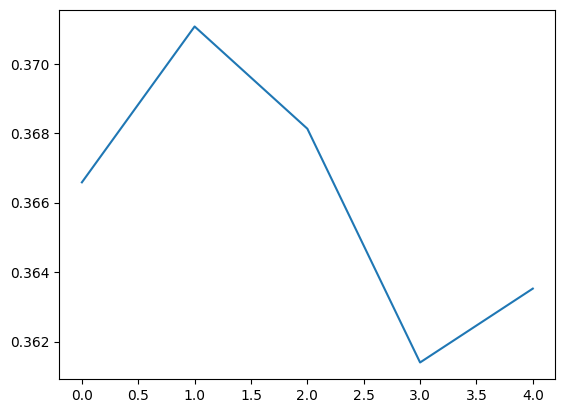

In [101]:
plt.plot(history.history["loss"])

In [102]:
plt.plot(history.history["acurracy"])

KeyError: 'acurracy'

## Save the Model
Save the trained model for submission.

In [95]:
model.save('a.keras')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here: